<a href="https://colab.research.google.com/github/Diggi14/project_Property/blob/main/4_uni_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/Diggi14/property.git

fatal: destination path 'property' already exists and is not an empty directory.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df=pd.read_csv('property/gurgaon1.csv')

In [ ]:
df.head()

,society,price,price_per_sq.ft,bedRoom,bathroom,balcony,floorNum,facing,type,sector,...,Carpet_area,Not available,Study Room,Servant Room,Pooja Room,Others,age,luxury_score,furnishing_type,location_score
0,maa bhagwati residency,0.45,5000,2,2,1,4.0,West,flat,sector 7,...,900.0,1,0,0,0,0,relatively new,15,1,27
1,Apna Enclave,0.50,7692,2,2,1,1.0,West,flat,sector 3,...,650.0,1,0,0,0,0,NaN,21,2,34
2,Tulsiani Easy in Homes,0.40,6722,2,2,3,12.0,NaN,flat,sohna,...,595.0,1,0,0,0,0,New Property,41,1,25
3,Smart World Orchard,1.47,12250,2,2,2,2.0,NaN,flat,sector 61,...,1200.0,0,1,0,0,0,relatively new,69,1,51
4,Parkwood Westend,0.70,5204,2,2,3,5.0,NaN,flat,sector 92,...,NaN,0,1,0,0,0,Under Construction,0,1,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2494 entries, 0 to 2493
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   society           2494 non-null   object 
 1   price             2494 non-null   float64
 2   price_per_sq.ft   2494 non-null   int64  
 3   bedRoom           2494 non-null   int64  
 4   bathroom          2494 non-null   int64  
 5   balcony           2494 non-null   object 
 6   floorNum          2479 non-null   float64
 7   facing            1654 non-null   object 
 8   type              2494 non-null   object 
 9   sector            2494 non-null   object 
 10  Super_build_area  1134 non-null   float64
 11  build_area        820 non-null    float64
 12  Carpet_area       1185 non-null   float64
 13  Not available     2494 non-null   int64  
 14  Study Room        2494 non-null   int64  
 15  Servant Room      2494 non-null   int64  
 16  Pooja Room        2494 non-null   int64  


In [ ]:
df.duplicated().sum()

np.int64(84)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(2410, 22)

In [ ]:
df['society'].value_counts().shape

(557,)

In [ ]:
df['society'].value_counts()

,count
society,
independent,399
Tulip Violet,44
Shapoorji Pallonji Joyville Gurugram,35
SS The Leaf,34
Smart World Orchard,27
...,...
Ansal Sushant Lok,1
DLF South City 1,1
Adani Brahma Samsara,1


In [ ]:
df[df['society']!='independent']['society'].value_counts(normalize=True).cumsum().head(80)

,proportion
society,
Tulip Violet,0.021880
Shapoorji Pallonji Joyville Gurugram,0.039284
SS The Leaf,0.056191
Smart World Orchard,0.069617
Signature Global Park,0.082049
...,...
Ireo The Corridors,0.489309
ATS Kocoon,0.492790
Pareena Mi Casa,0.496271


for appartment:top 80 appartment have 50% data

In [ ]:
society=df['society'].value_counts()

freq_bins={
    "very high >100":(society>100).sum(),
    "high 50-100":((society<100) & (society>=50)).sum(),
    "moderate 10-50":((society<50) & (society>=10)).sum(),
    "low 1-10":((society<10) & (society>1)).sum(),
    "v.low 1":(society==1).sum(),
}

In [ ]:
freq_bins

{'very high >100': np.int64(1),
 'high 50-100': np.int64(0),
 'moderate 10-50': np.int64(46),
 'low 1-10': np.int64(257),
 'v.low 1': np.int64(253)}

<Axes: >

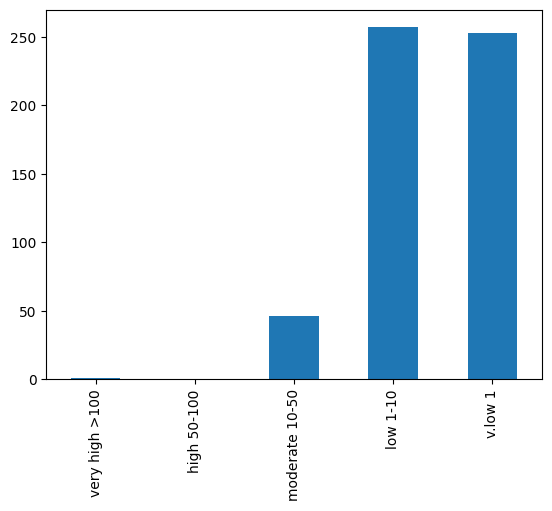

In [ ]:
freq_series = pd.Series(freq_bins)
freq_series.plot(kind='bar')

<Axes: xlabel='society'>

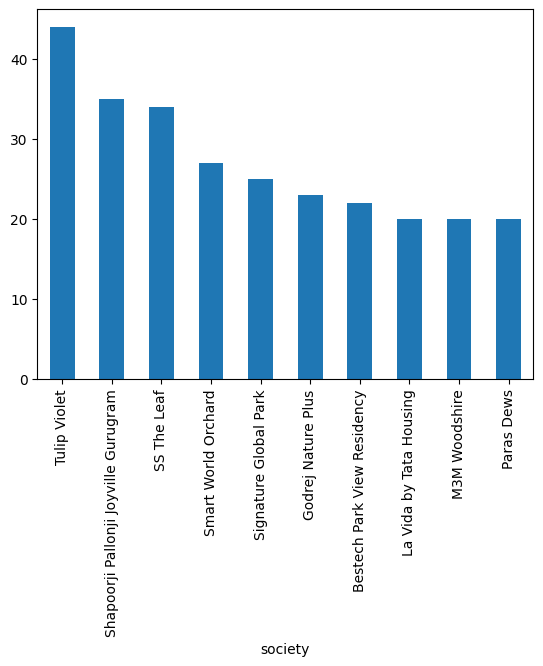

In [ ]:
df[df['society']!='independent']['society'].value_counts().head(10).plot(kind='bar')

In [ ]:
df['society'].isna().sum()

np.int64(0)

summary:
399 are independent property
1 appartment have more than 100 flats
46 have between 10 to 49 flats
257 and 253 have 2 to 9 and 1 flats
top 80 appartments holds the 50% of flat

In [ ]:
df['type'].value_counts()

,count
type,
flat,1777
house,633


In [ ]:
df['sector'].value_counts().shape

(111,)

<Axes: xlabel='sector'>

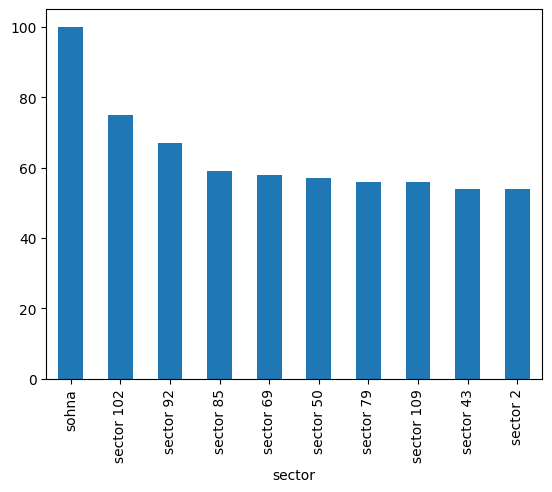

In [ ]:
df['sector'].value_counts().head(10).plot(kind='bar')

In [ ]:
df['sector'].value_counts(normalize=True).cumsum().head(24)

,proportion
sector,
sohna,0.041494
sector 102,0.072614
sector 92,0.100415
sector 85,0.124896
sector 69,0.148963
sector 50,0.172614
sector 79,0.195851
sector 109,0.219087
sector 43,0.241494


In [ ]:
sector=df['sector'].value_counts()

freq_bins={
    "very high >90":(sector>=90).sum(),
    "high 50-100":((sector<90) & (sector>=50)).sum(),
    "moderate 10-50":((sector<50) & (sector>=10)).sum(),
    "low 1-10":((sector<10) & (sector>1)).sum(),
    "v.low 1":(sector==1).sum(),
}

In [ ]:
freq_bins

{'very high >90': np.int64(1),
 'high 50-100': np.int64(10),
 'moderate 10-50': np.int64(58),
 'low 1-10': np.int64(42),
 'v.low 1': np.int64(0)}

<Axes: >

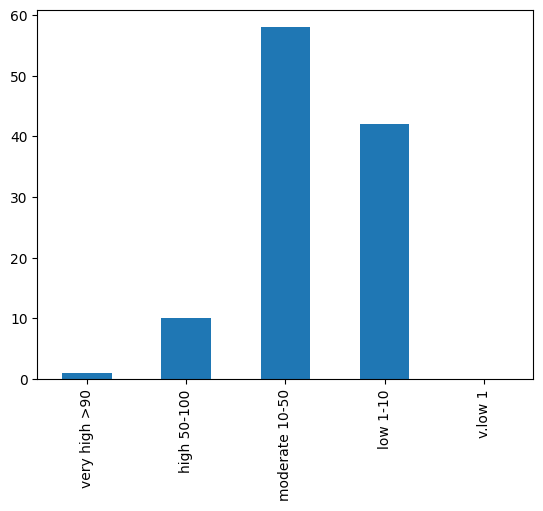

In [ ]:
freq_series = pd.Series(freq_bins)
freq_series.plot(kind='bar')

summary:
there are total of 111 sectors with around almost 50% properties in first 24 sector with :
 1 area with more than 90 properties,
 10 in (50-90),
 58 in (10-50),
 42 in (1-10),

In [ ]:
df['price'].isnull().sum()

np.int64(0)

In [ ]:
df['price'].describe()

,price
count,2410.000000
mean,2.662133
std,3.263824
min,0.080000
25%,0.900000
50%,1.500000
75%,2.850000
max,31.500000


<Axes: xlabel='price', ylabel='Count'>

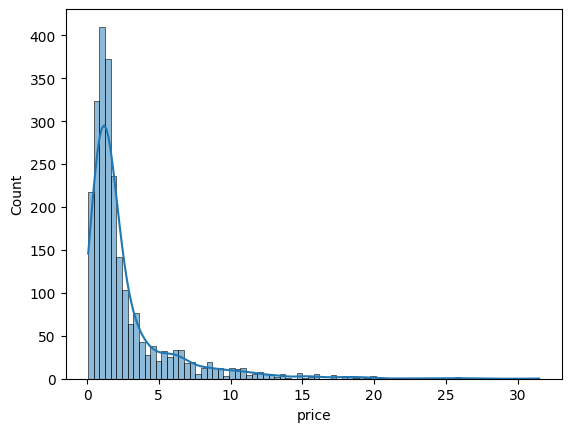

In [ ]:
sns.histplot(df['price'],bins=80,kde=True)

<Axes: xlabel='price'>

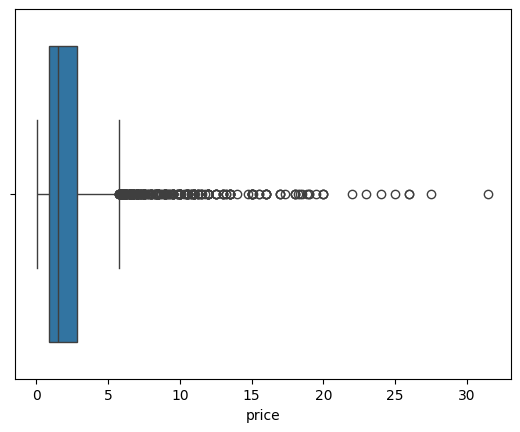

In [ ]:
sns.boxplot(x=df['price'])

left skewed

In [ ]:
df['price'].skew()

np.float64(3.1733682734155155)

positive skewness

In [ ]:
df['price'].kurt()

np.float64(13.554497791902273)

greater than 3 indicates heaver tail

In [ ]:
df['price'].quantile([0.01,0.05,0.95,0.99])

,price
0.01,0.2400
0.05,0.3600
0.95,9.3775
0.99,16.9100


In [ ]:
Q1=df['price'].quantile(0.25)
Q3=df['price'].quantile(0.75)
IQr=Q3-Q1

In [ ]:
lower_bound=Q1-1.5*IQr
upper_bound=Q3+1.5*IQr
print(lower_bound,upper_bound)

-2.0250000000000004 5.775


In [ ]:
outliers=df[(df['price']<lower_bound) | (df['price']>upper_bound)]

In [ ]:
outliers.shape

(289, 22)

In [ ]:
outliers['price'].describe()

,price
count,289.000000
mean,9.899965
std,4.347603
min,5.800000
25%,6.750000
50%,8.500000
75%,11.290000
max,31.500000


In [ ]:
price=df['price']

freq_bins={
    "0-1":((price>0)&(price<=1)).sum(),
    "1-2":((price>1)&(price<=2)).sum(),
    "2-3":((price>2)&(price<=3)).sum(),
    "3-4":((price>3)&(price<=4)).sum(),
    "4-5":((price>4)&(price<=5)).sum(),
    "5-10":((price>5)&(price<=10)).sum(),
    "10-20":((price>10)&(price<=20)).sum(),
    "20-30":((price>20)&(price<=30)).sum(),
    "greater than 30":(price>30).sum()
}

<Axes: >

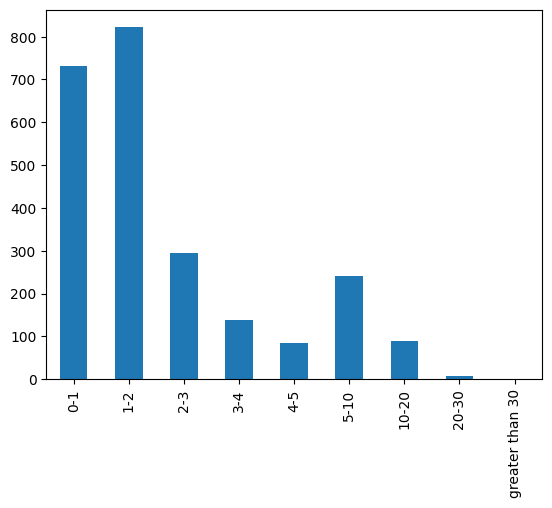

In [ ]:
freq_series = pd.Series(freq_bins)
freq_series.plot(kind='bar')

<Axes: xlabel='price', ylabel='Count'>

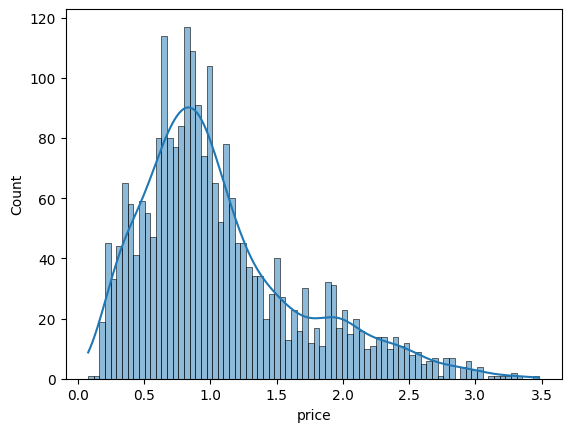

In [ ]:
sns.histplot(np.log1p(df['price']),bins=80,kde=True)

<Axes: ylabel='Count'>

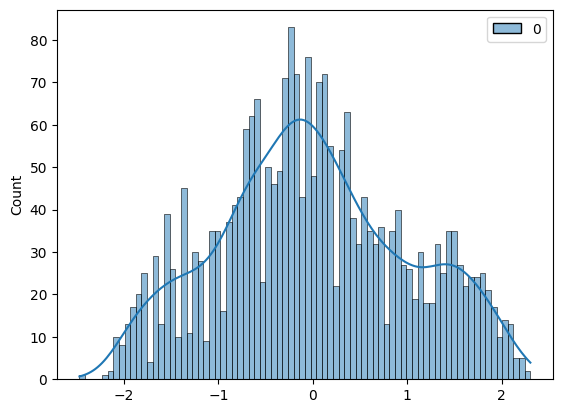

In [ ]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
sns.histplot(pt.fit_transform(df[['price']]),bins=80,kde=True)

In [ ]:
df['price_per_sq.ft'].describe()

,price_per_sq.ft
count,2410.000000
mean,14744.652282
std,25361.257546
min,4.000000
25%,6764.250000
50%,9139.000000
75%,14382.750000
max,600000.000000


In [ ]:
Q1=df['price_per_sq.ft'].quantile(0.25)
Q3=df['price_per_sq.ft'].quantile(0.75)
IQR=Q3-Q1

In [ ]:
lower_bound=Q1-1.5*IQr
upper_bound=Q3+1.5*IQr
print(lower_bound,upper_bound)

6761.325 14385.675


In [ ]:
outliers=df[(df['price_per_sq.ft']<lower_bound) | (df['price_per_sq.ft']>upper_bound)]

In [ ]:
outliers.shape

(1205, 22)

<Axes: xlabel='price_per_sq.ft'>

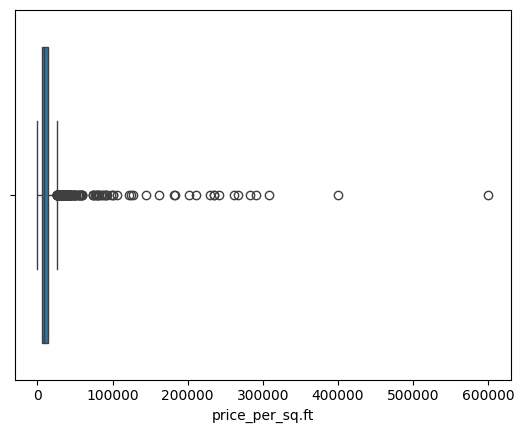

In [ ]:
sns.boxplot(x=df['price_per_sq.ft'])

<Axes: xlabel='price_per_sq.ft', ylabel='Count'>

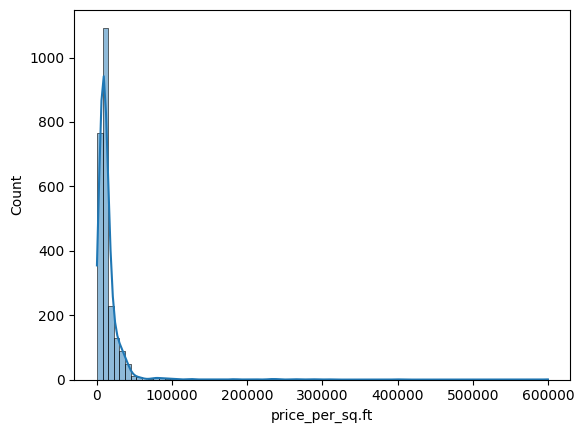

In [ ]:
sns.histplot(df['price_per_sq.ft'],bins=80,kde=True)

<Axes: ylabel='Count'>

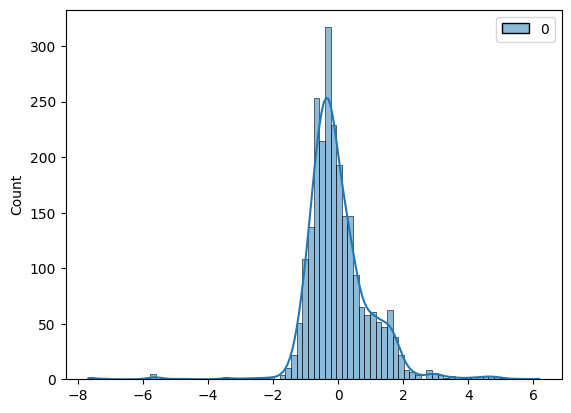

In [ ]:
tran=pt.fit_transform(df[['price_per_sq.ft']])
sns.histplot(tran,bins=80,kde=True)

In [ ]:
tran

array([[-0.95973002],
       [-0.41625929],
       [-0.58820015],
       ...,
       [ 1.48790903],
       [ 1.56942214],
       [ 1.56065183]])

<Axes: >

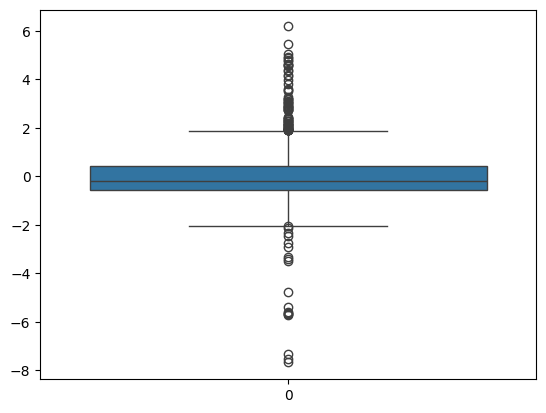

In [ ]:
sns.boxplot(tran)

<Axes: xlabel='price_per_sq.ft', ylabel='Count'>

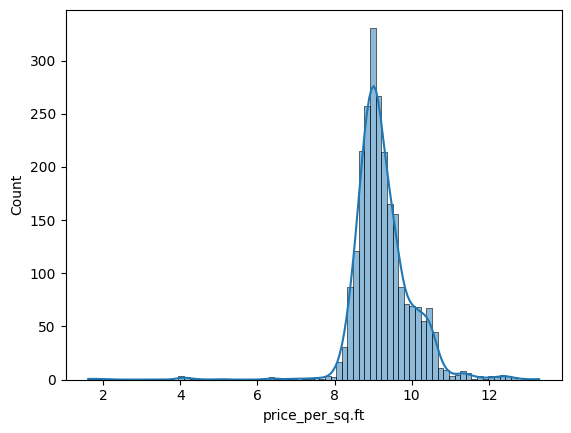

In [ ]:
sns.histplot(np.log1p(df['price_per_sq.ft']),bins=80,kde=True)

<Axes: xlabel='bedRoom'>

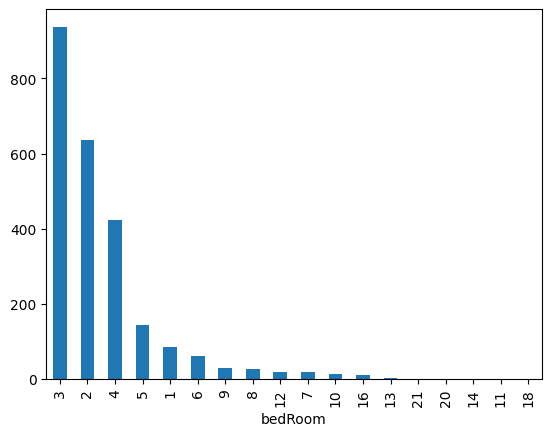

In [ ]:
df['bedRoom'].value_counts().plot(kind='bar')

In [ ]:
df[df['bedRoom']>=10] #mostly are house

,society,price,price_per_sq.ft,bedRoom,bathroom,balcony,floorNum,facing,type,sector,...,Carpet_area,Not available,Study Room,Servant Room,Pooja Room,Others,age,luxury_score,furnishing_type,location_score
1861,independent,2.10,38251,10,10,3+,5.0,West,house,sector 43,...,NaN,0,0,1,0,0,New Property,14,1,42
1862,independent,5.00,43066,21,21,3+,5.0,North,house,sector 54,...,NaN,0,0,1,0,0,relatively new,35,0,42
1863,independent,3.00,53763,12,12,3+,5.0,West,house,sector 43,...,NaN,0,0,0,0,1,New Property,14,0,42
1864,independent,4.50,39062,20,20,3+,4.0,East,house,sector 43,...,NaN,0,0,1,0,0,relatively new,15,0,42
1866,Luxury DLF City Floors,20.00,48889,16,16,3+,4.0,NaN,house,sector 26,...,NaN,0,0,1,0,0,New Property,25,2,45
1871,DLF City Plots Phase 3,5.00,34083,13,13,3+,4.0,North,house,sector 24,...,NaN,0,0,0,1,0,New Property,71,0,37
1888,independent,9.00,28490,10,10,3,3.0,East,house,sector 25,...,NaN,0,0,0,1,0,NaN,42,2,45
1892,FLOOR WISE DESIGNER KOTHI,13.00,48148,12,16,3+,4.0,North-East,house,sector 25,...,NaN,0,1,1,1,0,New Property,97,2,45
1896,independent,13.50,50000,16,16,3+,4.0,North-West,house,sector 43,...,NaN,0,1,1,1,1,relatively new,30,1,42
1910,independent,9.50,40135,12,12,3+,4.0,NaN,house,sector 40,...,NaN,0,0,0,0,0,New Property,35,2,39


<Axes: xlabel='bathroom'>

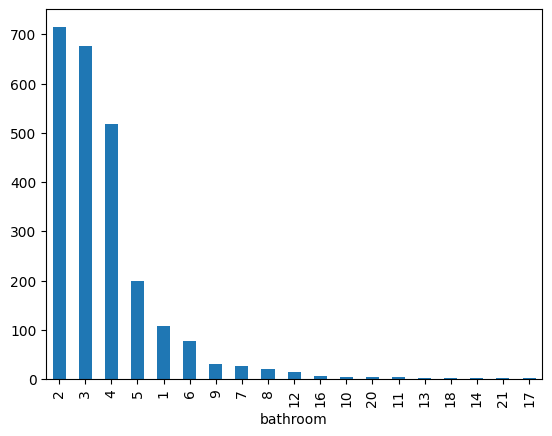

In [ ]:
df['bathroom'].value_counts().plot(kind='bar')

In [ ]:
df[df['bathroom']>=10] #mostly are house

,society,price,price_per_sq.ft,bedRoom,bathroom,balcony,floorNum,facing,type,sector,...,Carpet_area,Not available,Study Room,Servant Room,Pooja Room,Others,age,luxury_score,furnishing_type,location_score
1861,independent,2.10,38251,10,10,3+,5.0,West,house,sector 43,...,NaN,0,0,1,0,0,New Property,14,1,42
1862,independent,5.00,43066,21,21,3+,5.0,North,house,sector 54,...,NaN,0,0,1,0,0,relatively new,35,0,42
1863,independent,3.00,53763,12,12,3+,5.0,West,house,sector 43,...,NaN,0,0,0,0,1,New Property,14,0,42
1864,independent,4.50,39062,20,20,3+,4.0,East,house,sector 43,...,NaN,0,0,1,0,0,relatively new,15,0,42
1866,Luxury DLF City Floors,20.00,48889,16,16,3+,4.0,NaN,house,sector 26,...,NaN,0,0,1,0,0,New Property,25,2,45
1871,DLF City Plots Phase 3,5.00,34083,13,13,3+,4.0,North,house,sector 24,...,NaN,0,0,0,1,0,New Property,71,0,37
1888,independent,9.00,28490,10,10,3,3.0,East,house,sector 25,...,NaN,0,0,0,1,0,NaN,42,2,45
1892,FLOOR WISE DESIGNER KOTHI,13.00,48148,12,16,3+,4.0,North-East,house,sector 25,...,NaN,0,1,1,1,0,New Property,97,2,45
1896,independent,13.50,50000,16,16,3+,4.0,North-West,house,sector 43,...,NaN,0,1,1,1,1,relatively new,30,1,42
1910,independent,9.50,40135,12,12,3+,4.0,NaN,house,sector 40,...,NaN,0,0,0,0,0,New Property,35,2,39


<Axes: xlabel='balcony'>

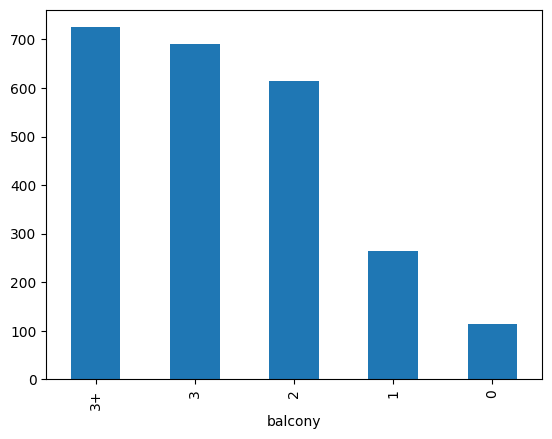

In [ ]:
df['balcony'].value_counts().plot(kind='bar')

In [ ]:
df[df['balcony']=='0']

,society,price,price_per_sq.ft,bedRoom,bathroom,balcony,floorNum,facing,type,sector,...,Carpet_area,Not available,Study Room,Servant Room,Pooja Room,Others,age,luxury_score,furnishing_type,location_score
57,M3M Soulitude,1.25,8784,3,3,0,4.0,NaN,flat,sector 89,...,1190.0,1,0,0,0,0,NaN,0,1,32
65,Signature Global Park,0.90,8036,3,2,0,2.0,NaN,flat,sector 36 sohna,...,NaN,1,0,0,0,0,relatively new,0,1,42
66,Godrej Nature Plus,1.75,8768,3,3,0,2.0,NaN,flat,sector-33 sohna,...,NaN,1,0,0,0,0,NaN,0,1,41
91,M3M One Key Resiments,0.80,13115,1,1,0,0.0,NaN,flat,sector 67,...,NaN,1,0,0,0,0,NaN,0,1,34
102,Sare Homes,1.25,6200,4,3,0,16.0,NaN,flat,sector 92,...,NaN,1,0,0,0,0,NaN,28,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2197,Nitin Vihar,0.85,9444,3,2,0,1.0,West,house,sector 33,...,NaN,1,0,0,0,0,relatively new,13,1,32
2203,independent,0.70,6034,3,3,0,1.0,North-East,house,sector 12,...,NaN,1,0,0,0,0,relatively new,16,1,61
2210,cloudnine cottages,5.50,55000,3,3,0,1.0,NaN,house,sohna road,...,NaN,1,0,0,0,0,old property,0,1,46
2279,independent,5.10,16569,3,2,0,1.0,East,house,sector 23a,...,100.0,0,0,0,0,1,NaN,18,1,61


<Axes: ylabel='Density'>

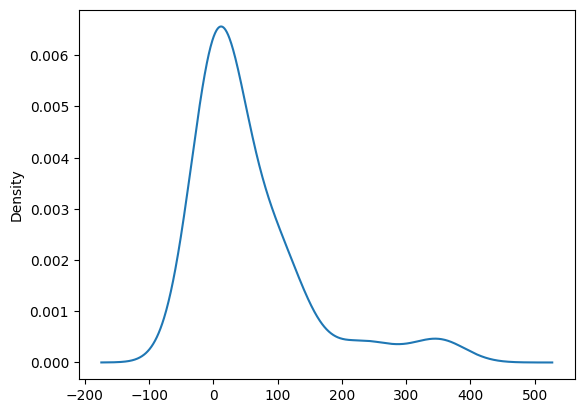

In [ ]:
df['floorNum'].value_counts().plot(kind='kde')

In [ ]:
df['floorNum'].skew() #right skewed

np.float64(1.902274271478217)

In [ ]:
df['floorNum'].kurt() #weight on the tail

np.float64(5.903670311709175)

In [ ]:
df.columns

Index(['society', 'price', 'price_per_sq.ft', 'bedRoom', 'bathroom', 'balcony',
       'floorNum', 'facing', 'type', 'sector', 'Super_build_area',
       'build_area', 'Carpet_area', 'Not available', 'Study Room',
       'Servant Room', 'Pooja Room', 'Others', 'age', 'luxury_score',
       'furnishing_type', 'location_score'],
      dtype='object')

In [ ]:
df['Super_build_area'].isna().sum()

np.int64(1304)

In [ ]:
df['Super_build_area'].describe()

,Super_build_area
count,1106.000000
mean,1891.967224
std,779.794824
min,145.000000
25%,1425.000000
50%,1789.500000
75%,2215.000000
max,10000.000000


<Axes: xlabel='Super_build_area'>

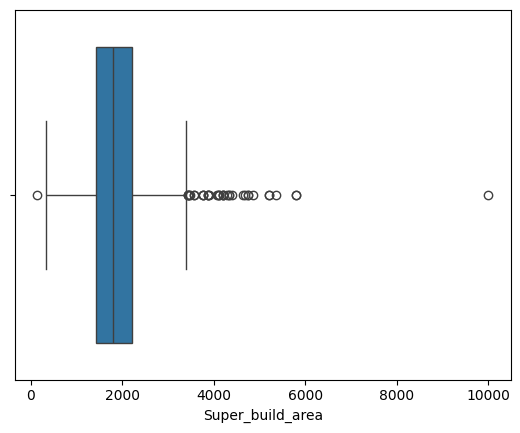

In [ ]:
sns.boxplot(x=df['Super_build_area'].dropna())

In [ ]:
Q1=df['Super_build_area'].quantile(0.25)
Q3=df['Super_build_area'].quantile(0.75)
IQR=Q3-Q1

In [ ]:
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
print(lower_bound,upper_bound)

240.0 3400.0


In [ ]:
df[
    (df['Super_build_area'] >= lower_bound) &
    (df['Super_build_area'] < Q1)
]['Super_build_area'].sort_values()


,Super_build_area
1839,325.0
1823,340.0
1753,352.0
120,380.0
1741,406.0
...,...
1208,1420.0
536,1420.0
1486,1423.0
1669,1423.0


In [ ]:
df[df['Super_build_area']<240] # val is wrong since super build area is less than capert area

,society,price,price_per_sq.ft,bedRoom,bathroom,balcony,floorNum,facing,type,sector,...,Carpet_area,Not available,Study Room,Servant Room,Pooja Room,Others,age,luxury_score,furnishing_type,location_score
1185,Godrej Nature Plus,1.4,15124,3,2,3+,20.0,NaN,flat,sector-33 sohna,...,925.618,1,0,0,0,0,New Property,65,1,41


In [ ]:
df[df['Super_build_area']>8000]

,society,price,price_per_sq.ft,bedRoom,bathroom,balcony,floorNum,facing,type,sector,...,Carpet_area,Not available,Study Room,Servant Room,Pooja Room,Others,age,luxury_score,furnishing_type,location_score
411,Krrish Provence Estate,7.5,7500,5,6,3+,23.0,North-East,flat,gwal pahari,...,NaN,0,0,1,1,1,relatively new,28,1,24


In [ ]:
df['build_area'].isna().sum()

np.int64(1614)

In [ ]:
df['build_area'].describe()

,build_area
count,796.000000
mean,2850.445031
std,26101.527892
min,14.000000
25%,900.000000
50%,1557.000000
75%,2700.000000
max,737147.000000


<Axes: xlabel='build_area'>

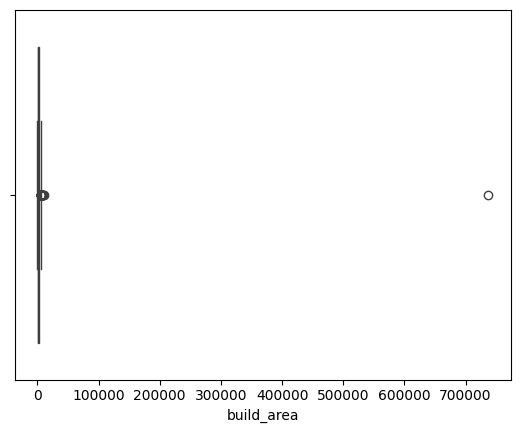

In [ ]:
sns.boxplot(x=df['build_area'].dropna())

In [ ]:
df[df['build_area']>600000] #definately outlier

,society,price,price_per_sq.ft,bedRoom,bathroom,balcony,floorNum,facing,type,sector,...,Carpet_area,Not available,Study Room,Servant Room,Pooja Room,Others,age,luxury_score,furnishing_type,location_score
1491,HCBS Sports Ville,0.35,4,2,2,2,8.0,NaN,flat,sohna,...,NaN,1,0,0,0,0,relatively new,27,0,0


In [ ]:
df['Carpet_area'].isna().sum()

np.int64(1273)

In [ ]:
df['Carpet_area'].describe()

,Carpet_area
count,1137.000000
mean,2821.462224
std,24917.151519
min,48.000000
25%,858.000000
50%,1320.000000
75%,1850.000000
max,607936.000000


<Axes: xlabel='Carpet_area', ylabel='Count'>

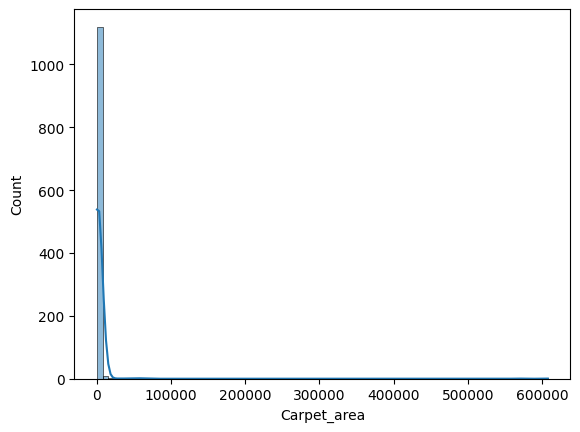

In [ ]:
sns.histplot(df['Carpet_area'].dropna(),bins=80,kde=True)

<Axes: xlabel='Carpet_area'>

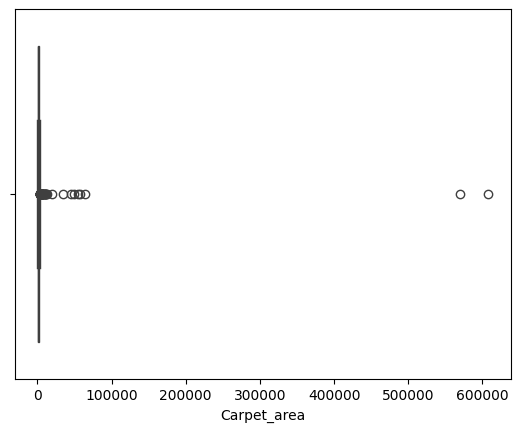

In [ ]:
sns.boxplot(x=df['Carpet_area'].dropna())

In [ ]:
Q1=df['Carpet_area'].quantile(0.25)
Q3=df['Carpet_area'].quantile(0.75)
IQR=Q3-Q1

In [ ]:
Q3

np.float64(1850.0)

In [ ]:
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
print(lower_bound,upper_bound)

-630.0 3338.0


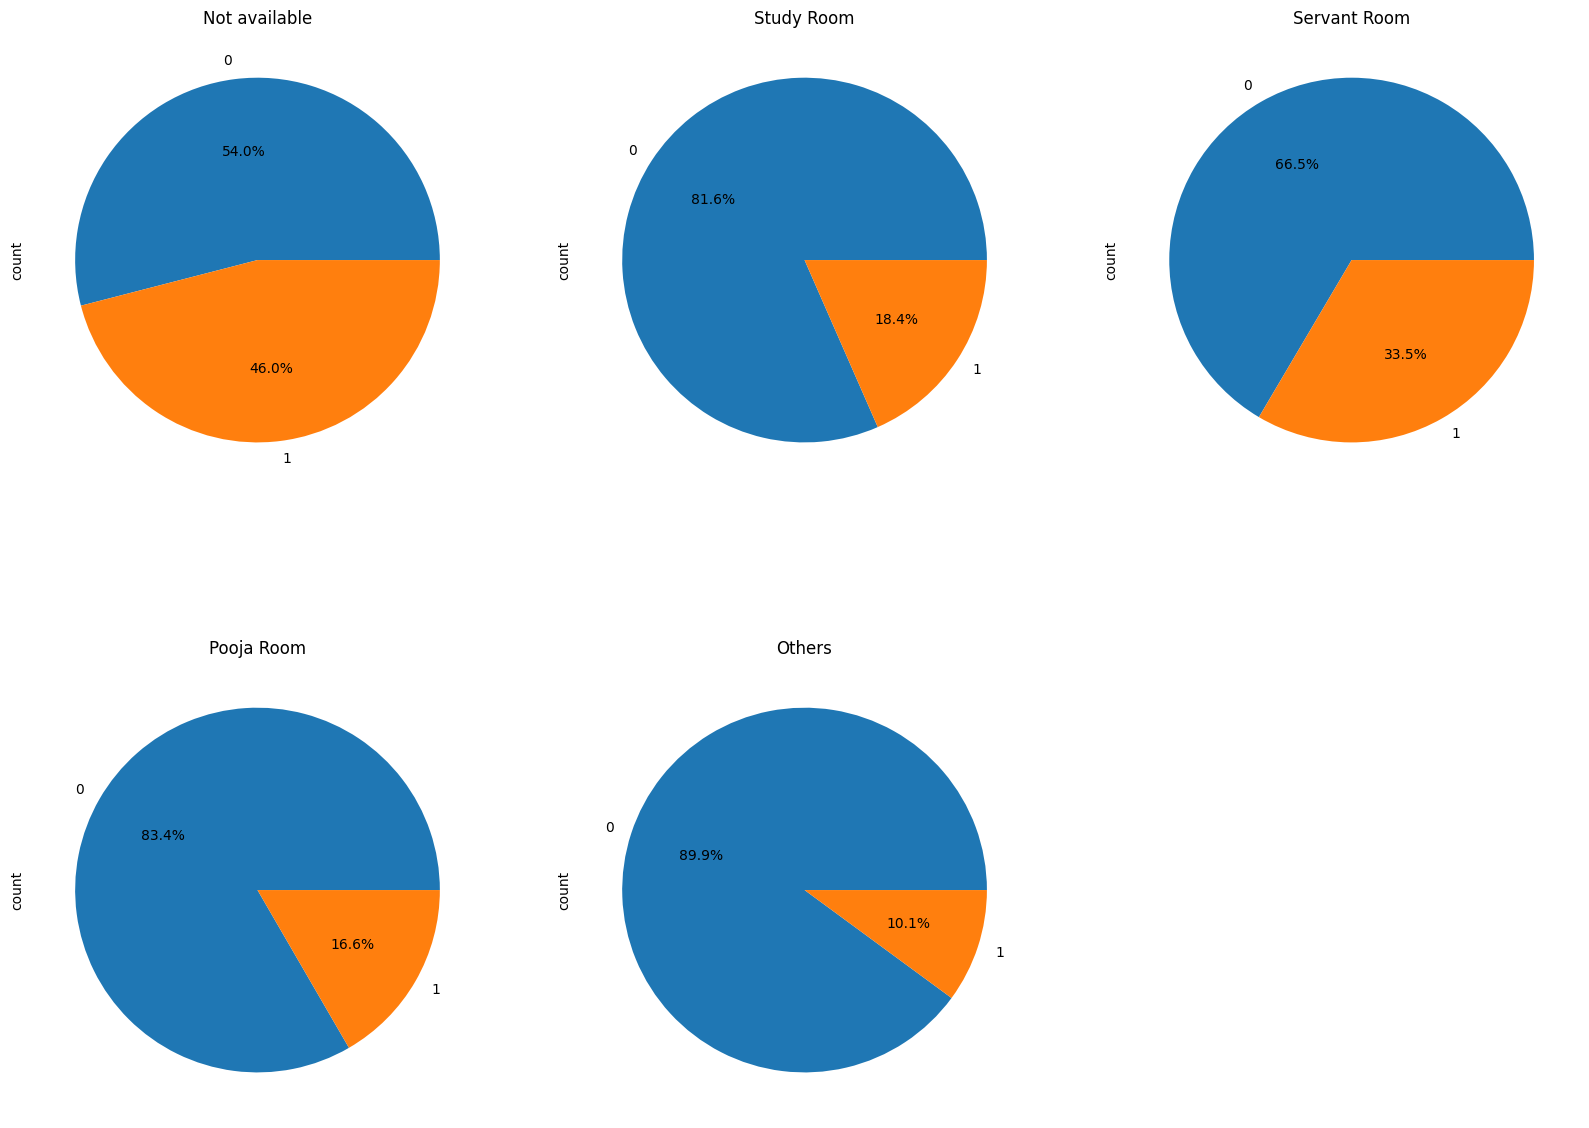

In [ ]:
plt.figure(figsize=(20,15))
col=['Not available', 'Study Room','Servant Room', 'Pooja Room', 'Others']
for i in range(0,len(col)):
  ax=plt.subplot(2,3,i+1)
  df[col[i]].value_counts().plot(kind='pie',autopct='%1.1f%%',ax=ax)
  plt.title(col[i])

around 46% dont have any additional room
18% property have study room
33.5% have servant room
16% have pooja room
10% have some other room

In [ ]:
df['furnishing_type'].value_counts()

,count
furnishing_type,
1,1715
2,579
0,116


<Axes: ylabel='count'>

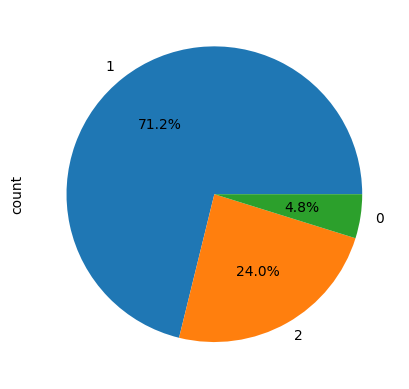

In [ ]:
df['furnishing_type'].value_counts().plot(kind='pie',autopct='%1.1f%%')

4.8% are unfurnished
71.2% are semi furnished
24% are furnished

In [ ]:
df.columns

Index(['society', 'price', 'price_per_sq.ft', 'bedRoom', 'bathroom', 'balcony',
       'floorNum', 'facing', 'type', 'sector', 'Super_build_area',
       'build_area', 'Carpet_area', 'Not available', 'Study Room',
       'Servant Room', 'Pooja Room', 'Others', 'age', 'luxury_score',
       'furnishing_type', 'location_score'],
      dtype='object')

In [ ]:
df['luxury_score'].describe()

,luxury_score
count,2410.000000
mean,48.976349
std,42.042772
min,0.000000
25%,14.250000
50%,36.000000
75%,81.000000
max,144.000000


In [ ]:
df['luxury_score'].isna().sum()

np.int64(0)

<Axes: xlabel='luxury_score', ylabel='Count'>

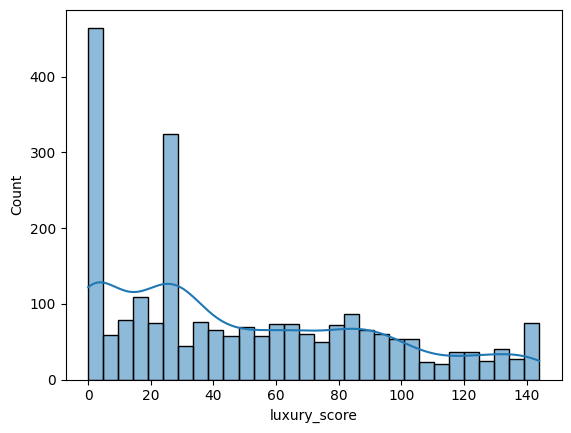

In [ ]:
sns.histplot(df['luxury_score'],bins=30,kde=True)

<Axes: xlabel='luxury_score'>

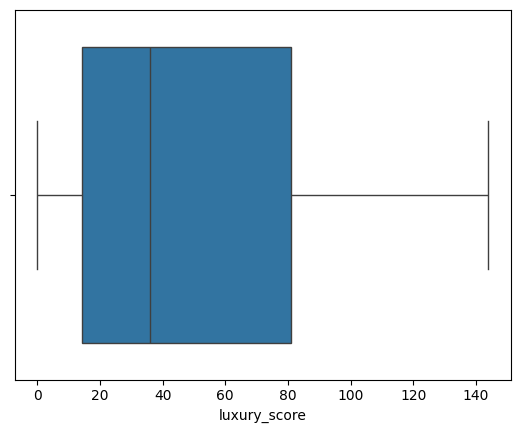

In [ ]:
sns.boxplot(x=df['luxury_score'])

In [ ]:
df['location_score'].describe()

,location_score
count,2410.000000
mean,35.110373
std,15.078412
min,0.000000
25%,27.000000
50%,40.000000
75%,45.000000
max,66.000000


<Axes: xlabel='location_score', ylabel='Count'>

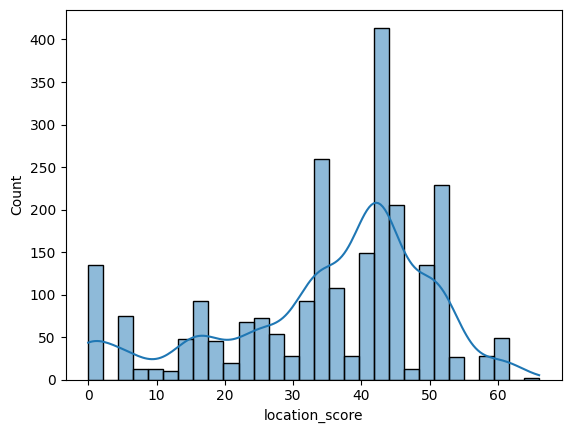

In [ ]:
sns.histplot(df['location_score'],bins=30,kde=True)

<Axes: xlabel='location_score'>

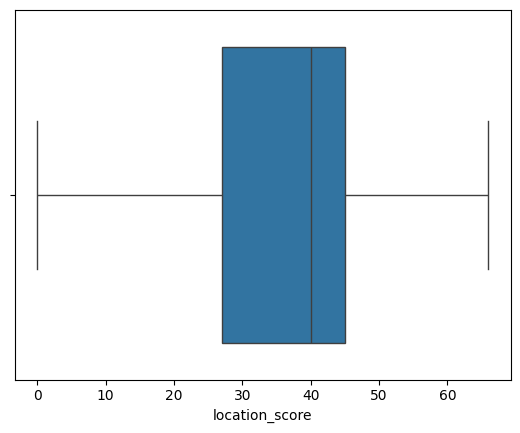

In [ ]:
sns.boxplot(x=df['location_score'])